In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [15]:
test = pd.read_csv('data/test.csv', index_col='id')
train = pd.read_csv('data/train.csv', index_col='id')

test.shape, train.shape

((91774, 12), (210457, 13))

In [16]:
display(test.head(2))
display(train.head(2))

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
id,,,,,,,,,,,,
210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624


,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
id,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36


In [17]:
sub = pd.read_csv('data/submission_제출양식.csv')
print(sub.shape)
sub.head(2)

(91774, 2)


,id,next_arrive_time
0,210457,0
1,210458,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210457 entries, 0 to 210456
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              210457 non-null  object 
 1   route_id          210457 non-null  int64  
 2   vh_id             210457 non-null  int64  
 3   route_nm          210457 non-null  object 
 4   now_latitude      210457 non-null  float64
 5   now_longitude     210457 non-null  float64
 6   now_station       210457 non-null  object 
 7   now_arrive_time   210457 non-null  object 
 8   distance          210457 non-null  float64
 9   next_station      210457 non-null  object 
 10  next_latitude     210457 non-null  float64
 11  next_longitude    210457 non-null  float64
 12  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 22.5+ MB


In [19]:
train['date'] = pd.to_datetime(train['date'])

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91774 entries, 210457 to 302354
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             91774 non-null  object 
 1   route_id         91774 non-null  int64  
 2   vh_id            91774 non-null  int64  
 3   route_nm         91774 non-null  object 
 4   now_latitude     91774 non-null  float64
 5   now_longitude    91774 non-null  float64
 6   now_station      91774 non-null  object 
 7   now_arrive_time  91774 non-null  object 
 8   distance         91774 non-null  float64
 9   next_station     91774 non-null  object 
 10  next_latitude    91774 non-null  float64
 11  next_longitude   91774 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 9.1+ MB


In [21]:
test['date'] = pd.to_datetime(test['date'])

In [22]:
train['now_arrive_time'] = train['now_arrive_time'].map(lambda x : x[:-1])
test['now_arrive_time'] = test['now_arrive_time'].map(lambda x : x[:-1])

train['now_arrive_time'] = pd.to_numeric(train['now_arrive_time'], downcast='unsigned')
test['now_arrive_time'] = pd.to_numeric(test['now_arrive_time'], downcast='unsigned')

In [23]:
train.dtypes, test.dtypes

(date                datetime64[ns]
 route_id                     int64
 vh_id                        int64
 route_nm                    object
 now_latitude               float64
 now_longitude              float64
 now_station                 object
 now_arrive_time              uint8
 distance                   float64
 next_station                object
 next_latitude              float64
 next_longitude             float64
 next_arrive_time             int64
 dtype: object,
 date               datetime64[ns]
 route_id                    int64
 vh_id                       int64
 route_nm                   object
 now_latitude              float64
 now_longitude             float64
 now_station                object
 now_arrive_time             uint8
 distance                  float64
 next_station               object
 next_latitude             float64
 next_longitude            float64
 dtype: object)

In [24]:
train.describe()

,route_id,vh_id,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time
count,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,4.052491e+08,7.988694e+06,33.434528,126.603451,13.785990,490.256100,33.434711,126.603687,85.380824
std,9.132404e+04,6.774077e+03,0.102350,0.123961,4.682768,520.563932,0.102224,0.123838,85.051170
min,4.051360e+08,7.983000e+06,33.244382,126.473300,0.000000,97.000000,33.244382,126.473300,6.000000
25%,4.051365e+08,7.983093e+06,33.325283,126.523900,10.000000,291.000000,33.325283,126.524550,44.000000
50%,4.053201e+08,7.983431e+06,33.484667,126.551050,14.000000,384.000000,33.484860,126.551050,66.000000
75%,4.053201e+08,7.997041e+06,33.500197,126.650322,18.000000,542.000000,33.500228,126.650322,102.000000
max,4.053281e+08,7.997124e+06,33.556167,126.935188,23.000000,7461.000000,33.556167,126.935188,2996.000000


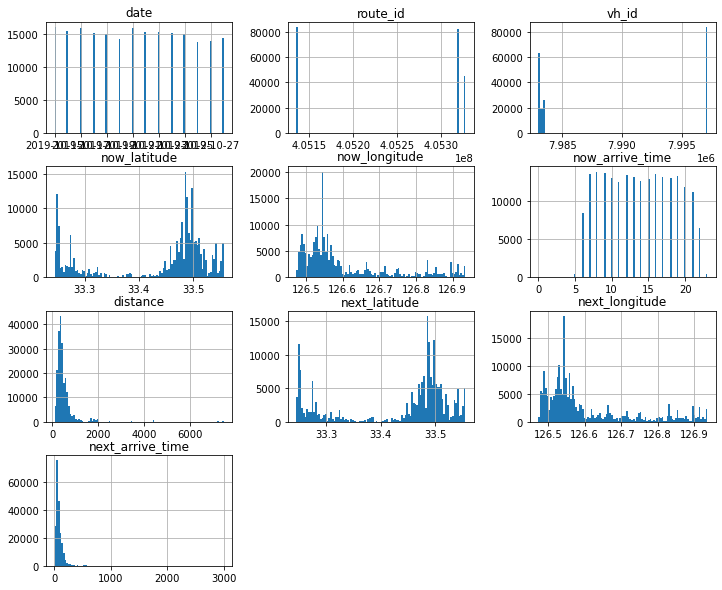

In [25]:
train.hist(bins=100, figsize=(12,10));

In [26]:
train['next_arrive_time'].describe()

count    210457.000000
mean         85.380824
std          85.051170
min           6.000000
25%          44.000000
50%          66.000000
75%         102.000000
max        2996.000000
Name: next_arrive_time, dtype: float64

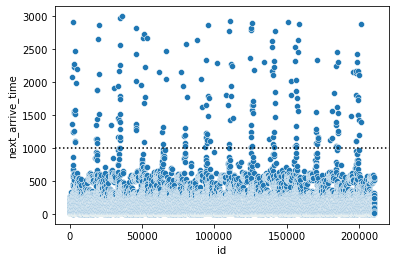

In [27]:
sns.scatterplot(data=train, x=train.index, y="next_arrive_time")
plt.axhline(1000, c="k", ls=":")

In [28]:
train = train[train['next_arrive_time'] <= 1000]
train

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
id,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,6,266.0,제대마을,33.457724,126.554014,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,6,333.0,제대아파트,33.458783,126.557353,36
2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,6,415.0,제주대학교,33.459893,126.561624,40
3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),6,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,7,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21,528.0,삼아아파트,33.251896,126.574417,96
210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21,114.0,아랑조을거리 입구,33.251084,126.559551,16


In [29]:
station_encoder = LabelEncoder()

all_station = list(train['now_station'].values) + list(train['next_station'].values)
station_set = set(all_station)
print(len(station_set))
station_encoder.fit(list(station_set))

train['now_station'] = station_encoder.transform(train['now_station'])
train['next_station'] = station_encoder.transform(train['next_station'])
test['now_station'] = station_encoder.transform(test['now_station'])
test['next_station'] = station_encoder.transform(test['next_station'])
train.head()

351


,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
id,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,36
2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,6,415.0,235,33.459893,126.561624,40
3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,6,578.0,249,33.484860,126.542928,42
4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,7,374.0,221,33.485822,126.490897,64


In [30]:
train['weekday'] = train['date'].dt.weekday
train['weekday'] = train['weekday'].apply(lambda x : 0 if x < 5 else 1) 

train = pd.get_dummies(train, columns=['weekday'])
train.head(2)

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday_0,weekday_1
id,,,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,24,1,0
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,36,1,0


In [31]:
test['weekday'] = test['date'].dt.weekday
test['weekday'] = test['weekday'].apply(lambda x : 0 if x < 5 else 1) 

test = pd.get_dummies(test, columns=['weekday'])
test.head(2)

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,weekday_0,weekday_1
id,,,,,,,,,,,,,,
210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,7,333.0,228,33.458783,126.557353,1,0
210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,7,415.0,235,33.459893,126.561624,1,0


In [32]:
train.select_dtypes(include="object").nunique().nlargest()

route_nm    21
dtype: int64

In [33]:
nextcnt = train['next_station'].value_counts()
nextcnt

221    3519
249    3207
176    3190
222    3105
229    2553
       ... 
37       14
118      12
307      10
225       7
243       2
Name: next_station, Length: 350, dtype: int64

In [34]:
nowcnt = train['now_station'].value_counts()
nowcnt

41     3361
176    3098
63     3093
222    3056
221    2789
       ... 
113      25
192      21
145      18
307      11
225       7
Name: now_station, Length: 348, dtype: int64

<AxesSubplot:xlabel='count', ylabel='next_station'>

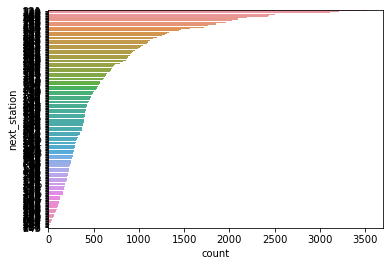

In [35]:
sns.countplot(data=train, y="next_station", order=nextcnt.index)

<AxesSubplot:xlabel='count', ylabel='now_station'>

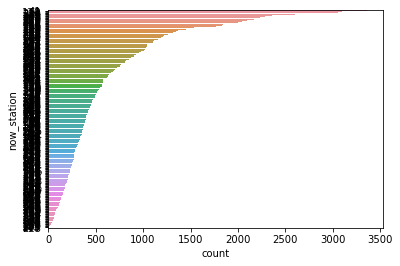

In [36]:
sns.countplot(data=train, y="now_station", order=nowcnt.index)

In [37]:
label_name = 'next_arrive_time'
label_name

'next_arrive_time'

In [38]:
train.columns.tolist()

['date',
 'route_id',
 'vh_id',
 'route_nm',
 'now_latitude',
 'now_longitude',
 'now_station',
 'now_arrive_time',
 'distance',
 'next_station',
 'next_latitude',
 'next_longitude',
 'next_arrive_time',
 'weekday_0',
 'weekday_1']

In [39]:
feature_names = train.columns.tolist()
feature_names.remove(label_name)
feature_names.remove('date')
feature_names.remove('route_nm')
feature_names.remove('now_latitude')
feature_names.remove('now_longitude')
feature_names.remove('next_latitude')
feature_names.remove('next_longitude')

feature_names

['route_id',
 'vh_id',
 'now_station',
 'now_arrive_time',
 'distance',
 'next_station',
 'weekday_0',
 'weekday_1']

In [40]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head(2)

(210257, 8)


,route_id,vh_id,now_station,now_arrive_time,distance,next_station,weekday_0,weekday_1
id,,,,,,,,
0,405136001,7997025,239,6,266.0,227,1,0
1,405136001,7997025,227,6,333.0,228,1,0


In [41]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(2)

(91774, 8)


,route_id,vh_id,now_station,now_arrive_time,distance,next_station,weekday_0,weekday_1
id,,,,,,,,
210457,405136001,7997025,227,7,333.0,228,1,0
210458,405136001,7997025,228,7,415.0,235,1,0


In [42]:
y_train = train[label_name]
print(y_train.shape)

(210257,)


In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(15, 30, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

reg = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         scoring="neg_root_mean_squared_error",
                         n_iter=10, cv=5, n_jobs=-1,
                         verbose=2, random_state=42)
reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([23, 28, 20, 15, 19, 29, 17, 17, 20, 24]),
                                        'max_features': array([0.9600236 , 0.92107563, 0.99614334, 0.9862188 , 0.89899882,
       0.88338077, 0.96667789, 0.91022071, 0.93600563, 0.92902084])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [45]:
# (max_depth=15, max_features=0.8483619676045983, n_jobs=-1, random_state=42)
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=15, max_features=0.9290208445924963, n_jobs=-1,
                      random_state=42)

In [46]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(best_model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


array([27.09507397, 36.0344281 , 46.37095111, ..., 19.6388657 ,
       25.15597943, 34.33185866])

In [47]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_valid_pred)

20.067477596637087

In [48]:
mse = np.square(y_train - y_valid_pred).mean()
mse

1125.001281657308

In [49]:
RMSE = np.sqrt(mse)
RMSE

33.5410387683105

In [50]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_train, y_valid_pred))
rmsle

0.3235125677855108

In [51]:
y_predict = best_model.fit(X_train, y_train).predict(X_test)
y_predict[:5]

array([ 35.60029423,  45.26935182, 136.33407317,  61.21130563,
       150.38753603])

In [52]:
sub['next_arrive_time'] = y_predict
sub.head(2)

,id,next_arrive_time
0,210457,35.600294
1,210458,45.269352


In [55]:
file_name = f'data/submission_{rmsle:.5f}.csv'
file_name

'data/submission_0.32351.csv'

In [56]:
sub.to_csv(file_name, index=False)

In [57]:
pd.read_csv(file_name)

,id,next_arrive_time
0,210457,35.600294
1,210458,45.269352
2,210459,136.334073
3,210460,61.211306
4,210461,150.387536
...,...,...
91769,302350,99.507943
91770,302351,73.376989
91771,302352,117.379498
91772,302353,31.091727
